# 日期和时间
- Python 金融大数据分析 附录C
- 目录：
  > - python
  > > http://www.cnblogs.com/fclbky/articles/4098204.html
  > - numpy
  > - pandas

In [53]:
from datetime import datetime
from datetime import timedelta

from dateutil.parser import parse
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1 python

### 1.1 datetime 模块
- 基本的日期和时间类型
- datetime 模块提供了各种类用于操作日期和时间，该模块侧重于高效率的格式化输出
- 在 Python 中，与时间处理有关的模块包括：time，datetime 以及 calendar

#### 1.1.1 常量
- datetime.MINYEAR 
  > date 和 datetime 对象所能支持的最小年份，object.MINYEAR 的值为 1
- datetime.MAXYEAR 
  > date 和 datetime 对象所能支持的最大年份，object.MAXYEAR 的值为 9999

#### 1.1.2 datetime 模块中定义的类（前四个下方有详解）：
- datetime.date 
  > 表示日期的类，常用属性：year, month, day
- datetime.time 
  > 表示时间的类，常用属性：hour, minute, second, microsecond, tzinfo
- datetime.datetime 
  > 表示日期和时间的类，常用属性： year, month, day, hour, minute, second, microsecond, tzinfo
- datetime.timedelta 
  > 表示时间间隔，即两个时间点（date，time，datetime）之间的长度
- datetime.tzinfo 
  > 表示时区的基类，为上方的 time 和 datetime 类提供调整的基准
- datetime.timezone
  > 表示 UTC 时区的固定偏移，是 tzinfo 基类的实现

- 注：上边这些类的对象是不可变的

- 上边这些类的从属关系：
- object
  > - timedelta
  > - tzinfo
  > > - timezone
  > - time
  > - date
  > > - datetime

#### 1.1.3 datetime 对象
- 是 date 对象和 time 对象的结合体，并且包含他们的所有信息
- 语法：
  > - datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)
  > - 必须的参数是 year（年）、month（月）、day（日）；tzinfo 可以是 None 或者 tzinfo 子类的实例对象；其余的参数可以是整数，并且在以下范围内：
  > > - MINYEAR <= year <= MAXYEAR（也就是 1 ~ 9999）
  > > - 1 <= month <= 12
  > > - 1 <= day <= 根据 year 和 month 来决定（例如 2015年2月 只有 28 天）
  > > - 0 <= hour < 24
  > > - 0 <= minute < 60
  > > - 0 <= second < 60
  > > - 0 <= microsecond < 1000000
  > - 注：如果参数超出范围，将引发 ValueError 异常

#### 1.1.3.1 datetime 类方法（classmethod）：
- datetime.today()
  > 返回一个表示当前本地时间的 datetime 对象，等同于 datetime.fromtimestamp(time.time())
- datetime.now(tz=None)
  > 返回一个表示当前本地时间的 datetime 对象；如果提供了参数 tz，则获取 tz 参数所指时区的本地时间
- datetime.utcnow()
  > 返回一个当前 UTC 时间的 datetime 对象
- datetime.fromtimestamp(timestamp, tz=None)
  > 根据时间戮创建一个 datetime 对象，参数 tz 指定时区信息
- datetime.utcfromtimestamp(timestamp)
  > 根据时间戮创建一个 UTC 时间的 datetime 对象
- datetime.fromordinal(ordinal)
  > 返回对应 Gregorian 日历时间对应的 datetime 对象
- datetime.combine(date, time)
  > 根据参数 date 和 time，创建一个 datetime 对象
- datetime.strptime(date_string, format)
  > 将格式化字符串转换为 datetime 对象

#### 1.1.3.2 datetime 实例方法：
- datetime.date()
  > 返回一个 date 对象datetime.time() - 返回一个 time 对象（tzinfo 属性为 None）
- datetime.timetz()
  > 返回一个 time() 对象（带有 tzinfo 属性）
- datetime.replace([year[, month[, day[, hour[, minute[, second[, microsecond[, tzinfo]]]]]]]])
  > 生成一个新的日期对象，用参数指定日期和时间代替原有对象中的属性
- datetime.astimezone(tz=None)
  > 传入一个新的 tzinfo 属性，返回根据新时区调整好的 datetime 对象
- datetime.utcoffset()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.utcoffset(self)
- datetime.dst()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.dst(self)
- datetime.tzname()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.tzname(self)
- datetime.timetuple()
  > 返回日期对应的 time.struct_time 对象（类似于 time 模块的 time.localtime()）
- datetime.utctimetuple()
  > 返回 UTC 日期对应的 time.struct_time 对象
- datetime.toordinal()
  > 返回日期对应的 Gregorian Calendar 日期（类似于 self.date().toordinal()）
- datetime.timestamp()
  > 返回当前时间的时间戳（类似于 time 模块的 time.time()）
- datetime.weekday()
  > 返回 0 ~ 6 表示星期几（星期一是 0，依此类推）
- datetime.isoweekday() 
  > 返回 1 ~ 7 表示星期几（星期一是1， 依此类推）
- datetime.isocalendar() 
  > 返回一个三元组格式 (year, month, day)
- datetime.isoformat(sep='T')
  > 返回一个 ISO 8601 格式的日期字符串，如 "YYYY-MM-DD" 的字符串
- datetime.\__str\__()
  > 对于 date 对象 d 来说，str(d) 相当于 d.isoformat()
- datetime.ctime()
  > 返回一个表示日期的字符串，相当于 time 模块的 time.ctime(time.mktime(d.timetuple()))
- datetime.strftime(format)
  > 返回自定义格式化字符串表示日期，下面有详解
- datetime.\__format\__(format)
  > 跟 datetime.strftime(format) 一样，这使得调用 str.format() 时可以指定 data 对象的字符串

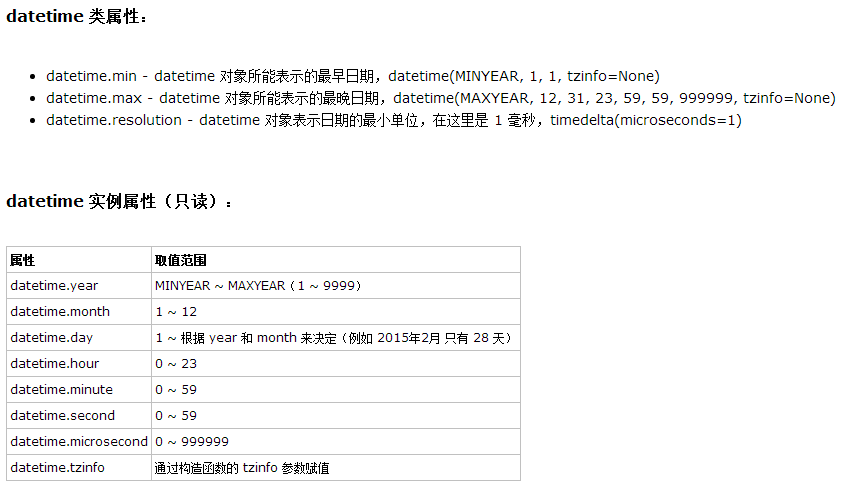

In [85]:
Image(filename="py35_picture\chap-111-7.png")

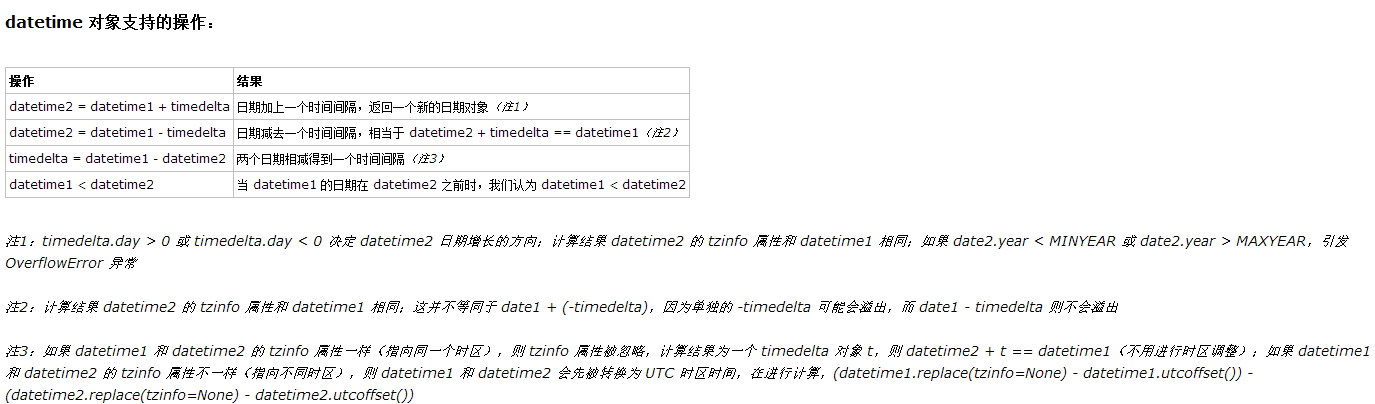

In [86]:
Image(filename="py35_picture\chap-111-8.png")

In [114]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2017, 1, 10, 14, 46, 28, 623660)

In [14]:
print('now is %s' %dt.datetime.now())

to = dt.datetime.today()
print('today is %s' %to)
print()
print(type(to)) # datetime 对象

print('weekend is %s' %dt.datetime.today().weekday()) # 0 = monday; zero-based numbering

now is 2017-01-10 11:10:24.924673
today is 2017-01-10 11:10:24.924674
<class 'datetime.datetime'>
weekend is 1


In [40]:
d = dt.datetime(2017,1,10,11,12,25,50000) # 构造 datetime 对象
print(d)
print(str(d))
print()

print(d.year) # 提取成分
print(d.month) 
print(d.day) 
print(d.hour) 

2017-01-10 11:12:25.050000
2017-01-10 11:12:25.050000

2017
1
10
11


In [38]:
o = d.toordinal() # 将日期信息转换为序数
print(o)
print(type(o))

dt.datetime.fromordinal(o) # 丢失了时间信息

736339
<class 'int'>


datetime.datetime(2017, 1, 10, 0, 0)

In [41]:
t = dt.datetime.time(d)  # 提取时间信息，得到time对象
print(t)
print(type(t))

dd = dt.datetime.date(d)  # 提取日期信息，得到date对象
print(dd)
print(type(dd))

d.replace(second = 0, microsecond = 0)

11:12:25.050000
<class 'datetime.time'>
2017-01-10
<class 'datetime.date'>


datetime.datetime(2017, 1, 10, 11, 12)

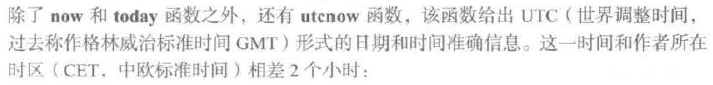

In [112]:
Image(filename="py35_picture\chap-UTC.png")

In [117]:
print(dt.datetime.utcnow()) # Coordinated Universal Time

dt.datetime.now() - dt.datetime.utcnow()  # UTC + 2h = CET(summer)

2017-01-10 06:48:11.090615


datetime.timedelta(0, 28800)

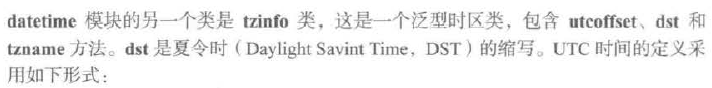

In [118]:
Image(filename="py35_picture\chap-DST.png")

In [121]:
class UTC(dt.tzinfo):
    def utcoffset(self,d):
        return dt.timedelta(hours = 0)
    def dst(self,d):
        return dt.timedelta(hours = 0)
    def tzname(self,d):
        return 'UTC'

In [122]:
u = dt.datetime.utcnow()  # replace 方法定义UTC
u = u.replace(tzinfo = UTC()) # attach time zone infromation
u

datetime.datetime(2017, 1, 10, 6, 53, 39, 931138, tzinfo=<__main__.UTC object at 0x000001C06CC576D8>)

In [123]:
class CET(dt.tzinfo):
    def utcoffset(self,d):
        return dt.timedelta(hours = 2)
    def dst(self,d):
        return dt.timedelta(hours = 1)
    def tzname(self,d):
        return 'CET + 1'

In [124]:
u.astimezone(CET()) # 使用astimezone方法，将基于UTC的对象转换为基于CET的对象

datetime.datetime(2017, 1, 10, 8, 53, 39, 931138, tzinfo=<__main__.CET object at 0x000001C06CC57BA8>)

In [89]:
from datetime import datetime, date, time

# 使用 datetime.combine()
d = date(2015, 8, 1)
t = time(12, 30)
print(d)
print(t)

print(datetime.combine(d, t))

2015-08-01
12:30:00
2015-08-01 12:30:00


In [91]:
# 使用 datetime.now() 或 datetime.utcnow()
print(datetime.now())
print(datetime.utcnow())

datetime(2014, 8, 31, 10, 13, 49, 347984)

2017-01-10 13:39:34.672547
2017-01-10 05:39:34.672547


datetime.datetime(2014, 8, 31, 10, 13, 49, 347984)

In [92]:
# 使用 datetime.srptime()
dt = datetime.strptime("21/11/14 16:30", "%d/%m/%y %H:%M")
dt

datetime.datetime(2014, 11, 21, 16, 30)

In [93]:
# 使用 datetime.timetuple()
tt = dt.timetuple()
print(tt);print()
for it in tt:
    print(it)

time.struct_time(tm_year=2014, tm_mon=11, tm_mday=21, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=4, tm_yday=325, tm_isdst=-1)

2014
11
21
16
30
0
4
325
-1


In [94]:
# ISO 格式的日期
ic = dt.isocalendar()
print(ic);print()
for it in ic:
     print(it)

(2014, 47, 5)

2014
47
5


In [96]:
# 格式化 datetime 对象
print(dt.strftime("%A, %d. %B %Y %I:%M%p"))
print('The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(dt, "day", "month", "time"))

Friday, 21. November 2014 04:30PM
The day is 21, the month is November, the time is 04:30PM.


- 带有 tzinfo 的 datetime 综合演示

In [98]:
from datetime import timedelta, datetime, tzinfo

class GMT1(tzinfo):
        def utcoffset(self, dt):
                return timedelta(hours=1) + self.dst(dt)
        def dst(self, dt):
                # DST 开始于三月最后一个星期天
                # 结束于十月最后一个星期天
                d = datetime(dt.year, 4, 1)
                self.dston = d - timedelta(days=d.weekday() + 1)
                d = datetime(dt.year, 11, 1)
                self.dstoff = d - timedelta(days=d.weekday() + 1)
                if self.dston <= dt.replace(tzinfo=None) < self.dstoff:
                        return timedelta(hours=1)
                else:
                        return timedelta(0)
        def tzname(self, dt):
                return "GMT +1"
        
class GMT2(tzinfo):
        def utcoffset(self, dt):
                return timedelta(hours=2) + self.dst(dt)
        def dst(self, dt):
                d = datetime(dt.year, 4, 1)
                self.dston = d - timedelta(days=d.weekday() + 1)
                d = datetime(dt.year, 11, 1)
                self.dstoff = d - timedelta(days=d.weekday() + 1)
                if self.dston <=  dt.replace(tzinfo=None) < self.dstoff:
                        return timedelta(hours=1)
                else:
                        return timedelta(0)
        def tzname(self, dt):
                return "GMT +2"
        
gmt1 = GMT1()

In [102]:
# 夏令时
dt1 = datetime(2014, 11, 21, 16, 30, tzinfo=gmt1)
print(dt1.dst())
print(dt1.utcoffset())

0:00:00
1:00:00


In [103]:
dt2 = datetime(2014, 6, 14, 13, 0, tzinfo=gmt1)
print(dt2.dst())
print(dt2.utcoffset())

1:00:00
2:00:00


In [104]:
# 将 datetime 转换到另一个时区
dt3 = dt2.astimezone(GMT2())
print(dt3)
print(dt2)
print(dt2.utctimetuple() == dt3.utctimetuple())

2014-06-14 14:00:00+03:00
2014-06-14 13:00:00+02:00
True
